In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

2024-08-23 19:32:12.631617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 19:32:12.631738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 19:32:12.763396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
# Set paths for your dataset
train_dir = '/kaggle/input/teeth-dataset/Teeth_Dataset/Training'
val_dir = '/kaggle/input/teeth-dataset/Teeth_Dataset/Validation'
test_dir = '/kaggle/input/teeth-dataset/Teeth_Dataset/Testing'

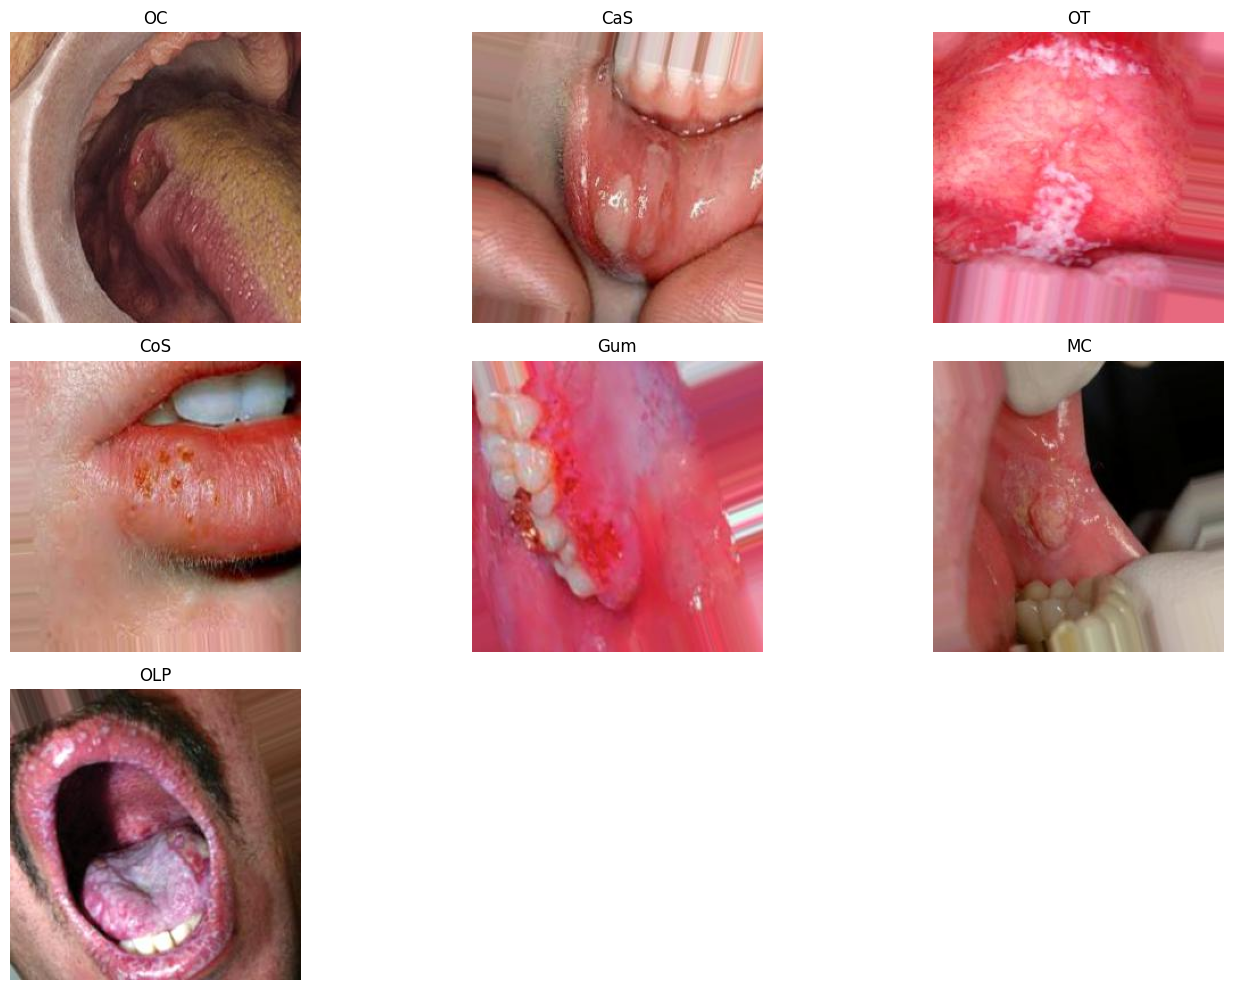

In [14]:
from PIL import Image
import os
import matplotlib.pyplot as plt
# List of classes (subfolders)
classes = os.listdir(train_dir)  # Use the actual directory path here

# Function to plot sample images from each class
def plot_sample_images(train_dir, classes):
    plt.figure(figsize=(14, 10))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(train_dir, class_name)
        sample_image = os.listdir(class_path)[0]  # Get first image
        image_path = os.path.join(class_path, sample_image)
        img = Image.open(image_path)

        # Plot the image
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot sample images
plot_sample_images(train_dir, classes)  # Pass the directory path

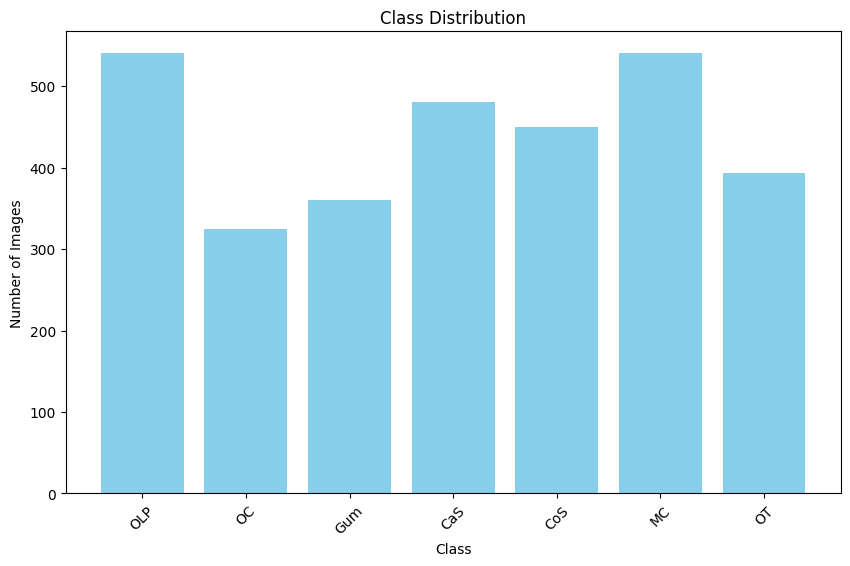

{'OLP': 540, 'OC': 324, 'Gum': 360, 'CaS': 480, 'CoS': 450, 'MC': 540, 'OT': 393}


In [18]:
# Function to count images in each class
def count_images_in_classes(train_dir, classes):
    class_distribution = {}
    for class_name in classes:
        class_path = os.path.join(train_dir, class_name)
        # Count the number of files (images) in the class folder
        num_images = len(os.listdir(class_path))
        class_distribution[class_name] = num_images
    return class_distribution

# Get the class distribution
class_distribution = count_images_in_classes(train_dir, classes)

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Print the class distribution
print(class_distribution)

In [19]:
# Load the dataset
batch_size = 32
img_size = (224, 224)  # ResNet expects 224x224 input size

In [20]:

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)
class_names = ["CaS", "CoS", "Gum", "MC", "OC", "OLP", "OT"]
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_names=class_names
)


Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


In [21]:

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(512, activation='relu')(x)  # Fully connected layer
predictions = Dense(7, activation='softmax')(x)  # 7 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=7  # Adjust epochs based on your needs
)

Epoch 1/7
 5/97 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.1380 - loss: 3.9504

W0000 00:00:1724442152.030831     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4787 - loss: 1.9277

W0000 00:00:1724442162.526032     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.4801 - loss: 1.9205 - val_accuracy: 0.7763 - val_loss: 0.6530
Epoch 2/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8445 - loss: 0.4540 - val_accuracy: 0.8881 - val_loss: 0.3672
Epoch 3/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9459 - loss: 0.2083 - val_accuracy: 0.9027 - val_loss: 0.3134
Epoch 4/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9720 - loss: 0.1213 - val_accuracy: 0.9358 - val_loss: 0.1989
Epoch 5/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9961 - loss: 0.0477 - val_accuracy: 0.9397 - val_loss: 0.2032
Epoch 6/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9987 - loss: 0.0287 - val_accuracy: 0.9446 - val_loss: 0.1646
Epoch 7/7
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9991 - loss: 0.0154 - val_accuracy: 0.9455 - val_loss: 0.1657


In [22]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9694 - loss: 0.1020
Test Accuracy: 0.95
Test Loss: 0.1524


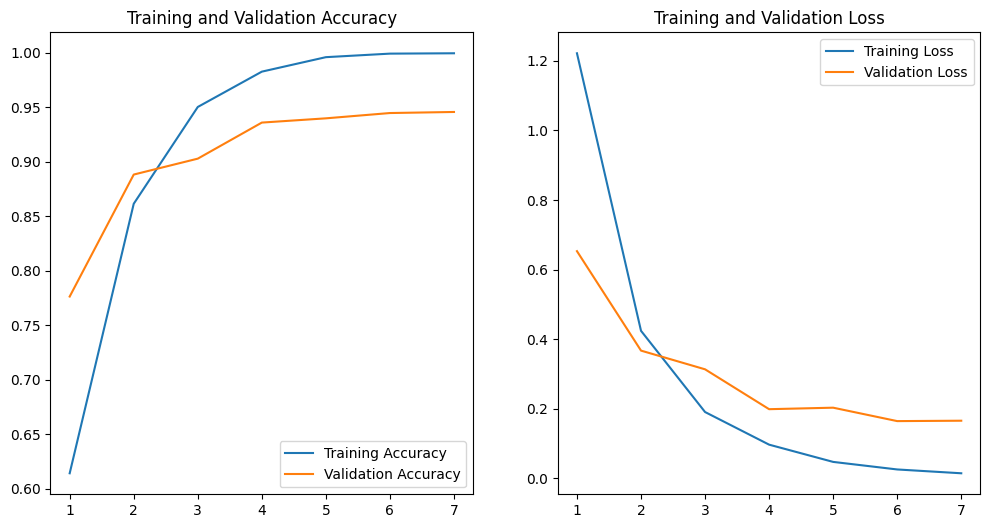

In [23]:
import matplotlib.pyplot as plt

# Extract data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


 5/33 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

W0000 00:00:1724442216.206754     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step


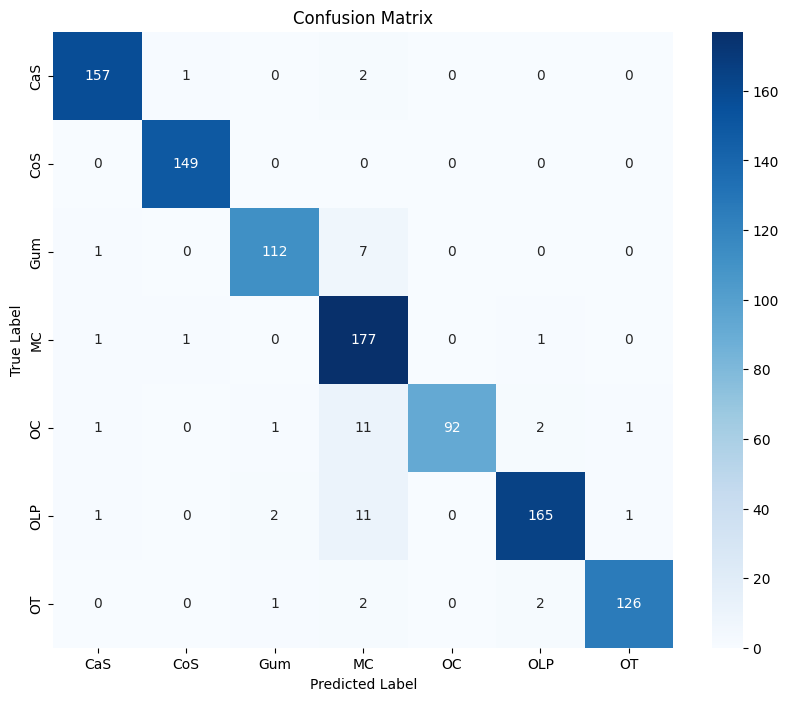

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(model.predict(test_dataset), axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Print the classification report
print(classification_report(y_true, y_pred, target_names=test_dataset.class_names))


              precision    recall  f1-score   support

         CaS       0.98      0.98      0.98       160
         CoS       0.99      1.00      0.99       149
         Gum       0.97      0.93      0.95       120
          MC       0.84      0.98      0.91       180
          OC       1.00      0.85      0.92       108
         OLP       0.97      0.92      0.94       180
          OT       0.98      0.96      0.97       131

    accuracy                           0.95      1028
   macro avg       0.96      0.95      0.95      1028
weighted avg       0.96      0.95      0.95      1028

